#Extracion de Datos

In [4]:
import pandas as pd
import requests

# URL del archivo JSON en GitHub sin la interfaz web
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Obtener los datos desde la URL
response = requests.get(url)
data_json = response.json()

# Convertir a DataFrame
df = pd.DataFrame(data_json)

df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##Conoce el COnjunto de **Datos**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


##Nos damos cuenta que esto es un diccionario con diccionarios mas pequeños entonces procedemos a normalizar

##Normalizando los datos

In [7]:
df_custommer= pd.json_normalize(df['customer'])
df_custommer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [8]:
df_phone= pd.json_normalize(df['phone'])
df_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [9]:
df_internet= pd.json_normalize(df['internet'])
df_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [10]:
df_account= pd.json_normalize(df['account'])
df_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


##Normalizacion final

In [11]:
df_account= pd.json_normalize(df['account'])
df_internet= pd.json_normalize(df['internet'])
df_phone= pd.json_normalize(df['phone'])
df_custommer= pd.json_normalize(df['customer'])
df_initial=pd.concat([df['customerID'],df['Churn']],axis=1)


df_final=pd.concat([df_initial,df_custommer,df_phone,df_internet,df_account],axis=1)
df_final


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#Transformacion de los Datos

In [15]:
df_account= pd.json_normalize(df['account'])
df_internet= pd.json_normalize(df['internet'])
df_phone= pd.json_normalize(df['phone'])
df_custommer= pd.json_normalize(df['customer'])
df_initial=pd.concat([df['customerID'],df['Churn']],axis=1)


df_final=pd.concat([df_initial,df_custommer,df_phone,df_internet,df_account],axis=1)


### Recuento de valores nulos por columna / Valores ausentes (Missing values)



In [24]:
# Recuento de valores nulos por columna
df_final.isnull().sum()

# Ver filas con nulos
df_final[df_final.isnull().any(axis=1)]

df_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


## Duplicados por **customerID**

In [19]:
# Duplicados por customerID
duplicados = df_final.duplicated(subset='customerID')
print(f"Duplicados encontrados: {duplicados.sum()}")

# Si quieres verlos
df_final[duplicados]


Duplicados encontrados: 0


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


##Inconsistencias categóricas

In [27]:
print(df_final['PaymentMethod'].unique())
print(df_final['Contract'].unique())

df_final['PaymentMethod'] = df_final['PaymentMethod'].str.lower().str.strip()
df_final

['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
['One year' 'Month-to-month' 'Two year']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,mailed check,67.85,4627.65


##Formato de Fecha

In [28]:
df_final['fecha'] = pd.to_datetime(df_final['fecha']).dt.normalize()

#no hay fecha, entonces por tanto no detecta

KeyError: 'fecha'

##Datos Inesperados

In [29]:
df_final.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [30]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,mailed check,67.85,4627.65


##Manejo de Inconsistencias

In [33]:
# Columnas con texto que puede tener variaciones
cols_texto = ['PaymentMethod', 'Contract', 'gender', 'InternetService', 'StreamingTV', 'StreamingMovies']

for col in cols_texto:
    df_final[col] = df_final[col].str.lower().str.strip()

df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,yes,no,one year,Yes,mailed check,65.60,593.3
1,0003-MKNFE,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,no,yes,month-to-month,No,mailed check,59.90,542.4
2,0004-TLHLJ,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,no,no,month-to-month,Yes,electronic check,73.90,280.85
3,0011-IGKFF,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,yes,yes,month-to-month,Yes,electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,yes,no,month-to-month,Yes,mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,female,0,No,No,13,Yes,No,dsl,...,No,No,Yes,no,no,one year,No,mailed check,55.15,742.9
7263,9992-RRAMN,Yes,male,0,Yes,No,22,Yes,Yes,fiber optic,...,No,No,No,no,yes,month-to-month,Yes,electronic check,85.10,1873.7
7264,9992-UJOEL,No,male,0,No,No,2,Yes,No,dsl,...,Yes,No,No,no,no,month-to-month,Yes,mailed check,50.30,92.75
7265,9993-LHIEB,No,male,0,Yes,Yes,67,Yes,No,dsl,...,No,Yes,Yes,no,yes,two year,No,mailed check,67.85,4627.65


##Busqueda de valores sospechosos (Startswith, contains)

In [36]:
df_final[df_final['InternetService'].str.contains('fiber', case=False, na=False)]
df_final[df_final['InternetService'].str.startswith('dsl', na=False)]


df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,yes,no,one year,Yes,mailed check,65.60,593.3
1,0003-MKNFE,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,no,yes,month-to-month,No,mailed check,59.90,542.4
2,0004-TLHLJ,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,no,no,month-to-month,Yes,electronic check,73.90,280.85
3,0011-IGKFF,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,yes,yes,month-to-month,Yes,electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,yes,no,month-to-month,Yes,mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,female,0,No,No,13,Yes,No,dsl,...,No,No,Yes,no,no,one year,No,mailed check,55.15,742.9
7263,9992-RRAMN,Yes,male,0,Yes,No,22,Yes,Yes,fiber optic,...,No,No,No,no,yes,month-to-month,Yes,electronic check,85.10,1873.7
7264,9992-UJOEL,No,male,0,No,No,2,Yes,No,dsl,...,Yes,No,No,no,no,month-to-month,Yes,mailed check,50.30,92.75
7265,9993-LHIEB,No,male,0,Yes,Yes,67,Yes,No,dsl,...,No,Yes,Yes,no,yes,two year,No,mailed check,67.85,4627.65


##Sustitucion de valores no informativos: n/a o unknown, o spcae null

In [38]:
df_final.replace(['n/a', 'unknown', ''], pd.NA, inplace=True)
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,yes,no,one year,Yes,mailed check,65.60,593.3
1,0003-MKNFE,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,no,yes,month-to-month,No,mailed check,59.90,542.4
2,0004-TLHLJ,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,no,no,month-to-month,Yes,electronic check,73.90,280.85
3,0011-IGKFF,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,yes,yes,month-to-month,Yes,electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,yes,no,month-to-month,Yes,mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,female,0,No,No,13,Yes,No,dsl,...,No,No,Yes,no,no,one year,No,mailed check,55.15,742.9
7263,9992-RRAMN,Yes,male,0,Yes,No,22,Yes,Yes,fiber optic,...,No,No,No,no,yes,month-to-month,Yes,electronic check,85.10,1873.7
7264,9992-UJOEL,No,male,0,No,No,2,Yes,No,dsl,...,Yes,No,No,no,no,month-to-month,Yes,mailed check,50.30,92.75
7265,9993-LHIEB,No,male,0,Yes,Yes,67,Yes,No,dsl,...,No,Yes,Yes,no,yes,two year,No,mailed check,67.85,4627.65


##Limpieza especifica numerica

In [40]:
df_final['Charges.Monthly'] = df_final['Charges.Monthly'].astype(str).str.replace('[^0-9.]', '', regex=True)
df_final['Charges.Monthly'] = pd.to_numeric(df_final['Charges.Monthly'], errors='coerce')

df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,yes,no,one year,Yes,mailed check,65.60,593.3
1,0003-MKNFE,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,no,yes,month-to-month,No,mailed check,59.90,542.4
2,0004-TLHLJ,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,no,no,month-to-month,Yes,electronic check,73.90,280.85
3,0011-IGKFF,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,yes,yes,month-to-month,Yes,electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,yes,no,month-to-month,Yes,mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,female,0,No,No,13,Yes,No,dsl,...,No,No,Yes,no,no,one year,No,mailed check,55.15,742.9
7263,9992-RRAMN,Yes,male,0,Yes,No,22,Yes,Yes,fiber optic,...,No,No,No,no,yes,month-to-month,Yes,electronic check,85.10,1873.7
7264,9992-UJOEL,No,male,0,No,No,2,Yes,No,dsl,...,Yes,No,No,no,no,month-to-month,Yes,mailed check,50.30,92.75
7265,9993-LHIEB,No,male,0,Yes,Yes,67,Yes,No,dsl,...,No,Yes,Yes,no,yes,two year,No,mailed check,67.85,4627.65


##Validacion final

In [43]:
for col in cols_texto:
    print(f"{col}: {df_final[col].unique()}")

PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Contract: ['one year' 'month-to-month' 'two year']
gender: ['female' 'male']
InternetService: ['dsl' 'fiber optic' 'no']
StreamingTV: ['yes' 'no' 'no internet service']
StreamingMovies: ['no' 'yes' 'no internet service']


##Columna de cuentas diarias

In [54]:
#Partimos de la columna "Charges.Monthly" y asumimos que un mes promedio tiene 30 días:
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30  # promedio del año

In [55]:
df_final[['Charges.Monthly', 'Cuentas_Diarias']]

,Charges.Monthly,Cuentas_Diarias
0,65.60,2.186667
1,59.90,1.996667
2,73.90,2.463333
3,98.00,3.266667
4,83.90,2.796667
...,...,...
7262,55.15,1.838333
7263,85.10,2.836667
7264,50.30,1.676667
7265,67.85,2.261667


##Estandarización y transformación de datos (opcional)

###Conversión de valores "Sí/No" a binarios Yes = 1, No =0

In [74]:
cols_binarias = ['Churn','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                 'StreamingTV', 'StreamingMovies', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'MultipleLines']

for col in cols_binarias:
    df_final[col] = df_final[col].replace({'yes': 1, 'no': 0,'Yes':1,'No':0,'No phone service':0, 'No internet service':0,'no internet service':0})

df_final

/tmp/ipython-input-74-4157710508.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[col] = df_final[col].replace({'yes': 1, 'no': 0,'Yes':1,'No':0,'No phone service':0, 'No internet service':0,'no internet service':0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,female,0,0,0,13,1,0,dsl,...,0,1,0,0,one year,0,mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,1,male,0,1,0,22,1,1,fiber optic,...,0,0,0,1,month-to-month,1,electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,0,male,0,0,0,2,1,0,dsl,...,0,0,0,0,month-to-month,1,mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,male,0,1,1,67,1,0,dsl,...,1,1,0,1,two year,0,mailed check,67.85,4627.65,2.261667


###Validacion rapida de transformacion

In [80]:
df_final.head(30)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.90,267.4,2.796667
5,0013-MHZWF,0,female,0,0,1,9,1,0,dsl,...,0,1,1,1,month-to-month,1,credit card (automatic),69.40,571.45,2.313333
6,0013-SMEOE,0,female,1,1,0,71,1,0,fiber optic,...,1,1,1,1,two year,1,bank transfer (automatic),109.70,7904.25,3.656667
7,0014-BMAQU,0,male,0,1,0,63,1,1,fiber optic,...,0,1,0,0,two year,1,credit card (automatic),84.65,5377.8,2.821667
8,0015-UOCOJ,0,female,1,0,0,7,1,0,dsl,...,0,0,0,0,month-to-month,1,electronic check,48.20,340.35,1.606667
9,0016-QLJIS,0,female,0,1,1,65,1,1,dsl,...,1,1,1,1,two year,1,mailed check,90.45,5957.9,3.015000


#Carga y Analisis

## Análisis Descriptivo con describe()

In [72]:
df_final.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333


##Distribución de evasión

###Conteo de valores

In [84]:
#"Churn" ya en formato binario (1 = evasión, 0 = permanencia) nos facilita muchísimo tanto la visualización como el modelado.

df_final['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


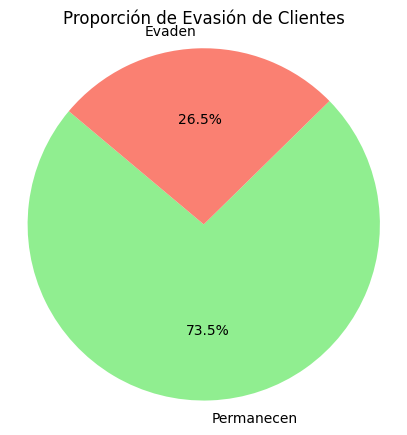

In [87]:
labels = ['Permanecen', 'Evaden']
sizes = df_final['Churn'].value_counts()
colors = ['lightgreen', 'salmon']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Evasión de Clientes')
plt.axis('equal')
plt.show()

##Recuento de evasión por variables categóricas

###Variables Categoricas de Interes

In [88]:
variables_categoricas = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

/tmp/ipython-input-89-126521393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='Churn', data=df_final, estimator=lambda x: sum(x)/len(x), palette='pastel')


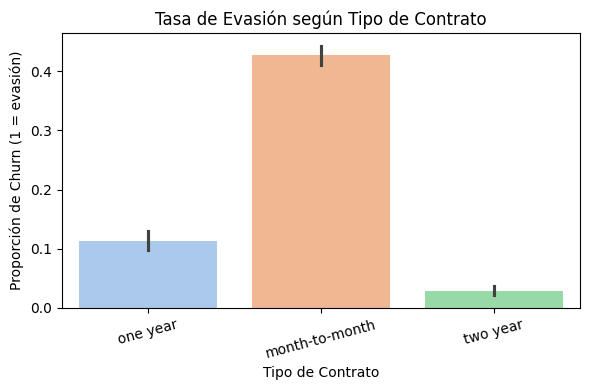

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x='Contract', y='Churn', data=df_final, estimator=lambda x: sum(x)/len(x), palette='pastel')
plt.title('Tasa de Evasión según Tipo de Contrato')
plt.ylabel('Proporción de Churn (1 = evasión)')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

/tmp/ipython-input-91-1296289485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=df_final, estimator=lambda x: sum(x)/len(x), palette='pastel')


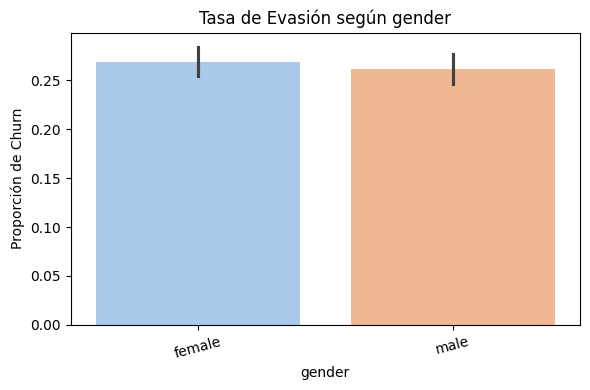

/tmp/ipython-input-91-1296289485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=df_final, estimator=lambda x: sum(x)/len(x), palette='pastel')


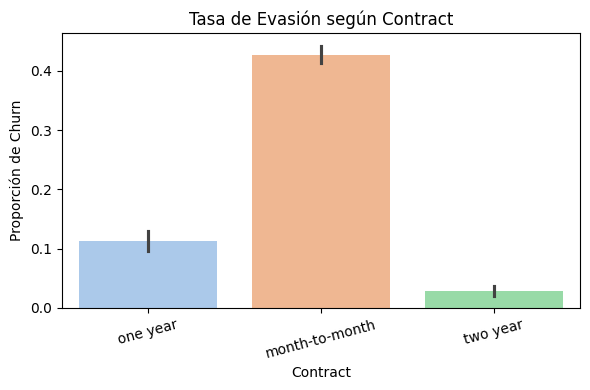

/tmp/ipython-input-91-1296289485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=df_final, estimator=lambda x: sum(x)/len(x), palette='pastel')


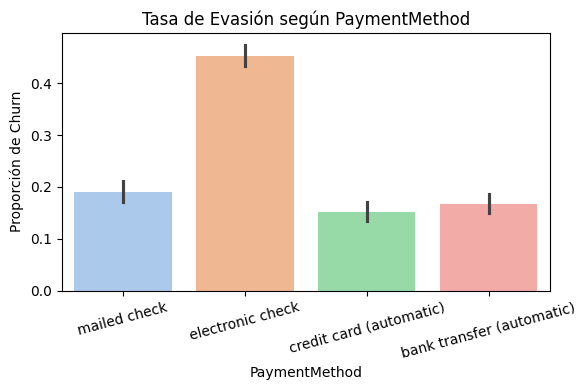

/tmp/ipython-input-91-1296289485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=df_final, estimator=lambda x: sum(x)/len(x), palette='pastel')


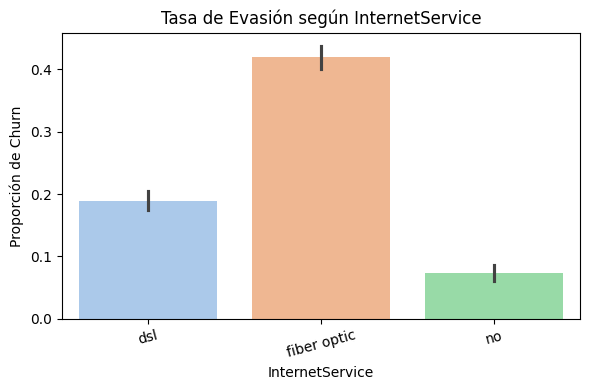

In [91]:
#🔍 Este gráfico muestra el porcentaje de clientes que evaden por categoría:

for var in variables_categoricas:
    plt.figure(figsize=(6,4))
    sns.barplot(x=var, y='Churn', data=df_final, estimator=lambda x: sum(x)/len(x), palette='pastel')
    plt.title(f'Tasa de Evasión según {var}')
    plt.ylabel('Proporción de Churn')
    plt.xlabel(var)
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

In [93]:
#Resumen

for var in variables_categoricas:
    tasa = df_final.groupby(var)['Churn'].mean().sort_values(ascending=False)
    print(f'\n{var} - Tasa de Churn:')
    print(tasa)


gender - Tasa de Churn:
gender
female    0.269209
male      0.261603
Name: Churn, dtype: object

Contract - Tasa de Churn:
Contract
month-to-month    0.427097
one year          0.112695
two year          0.028319
Name: Churn, dtype: object

PaymentMethod - Tasa de Churn:
PaymentMethod
electronic check             0.452854
mailed check                 0.191067
bank transfer (automatic)    0.167098
credit card (automatic)      0.152431
Name: Churn, dtype: object

InternetService - Tasa de Churn:
InternetService
fiber optic    0.418928
dsl            0.189591
no              0.07405
Name: Churn, dtype: object


##Conteo de evasión por variables numéricas

###Boxplot de variables numéricas vs. evasión

In [97]:
df_final.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.4,2.796667


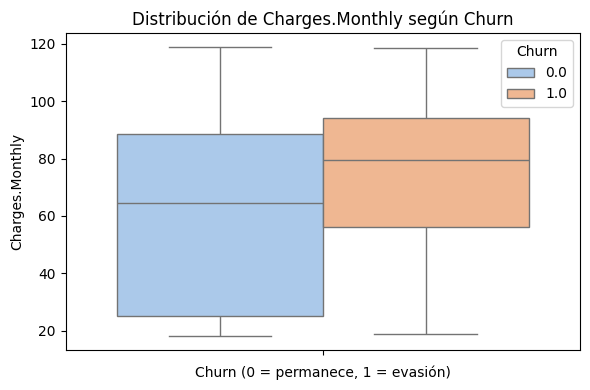

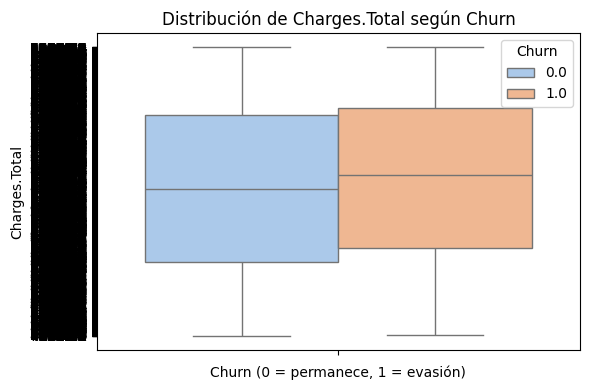

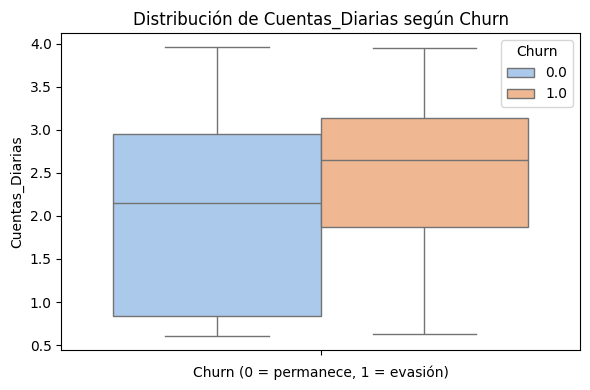

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

precio_cols = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
df_final['Churn'] = pd.to_numeric(df_final['Churn'], errors='coerce')


for col in precio_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(hue='Churn', y=col, data=df_final, palette='pastel')
    plt.title(f'Distribución de {col} según Churn')
    plt.xlabel('Churn (0 = permanece, 1 = evasión)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [115]:
precio_cols = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

for col in precio_cols:
    df_final[col] = df_final[col].astype(str).str.replace('[^0-9.]', '', regex=True)
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

In [117]:
import numpy as np

numericas = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
estadisticas = ['mean', 'median', 'std']

# Diccionario para guardar resultados
comparativo = {}

for col in numericas:
    comparativo[col] = {
        'Promedio (Evaden)': round(df_final[df_final['Churn'] == 1][col].mean(), 2),
        'Mediana (Evaden)': round(df_final[df_final['Churn'] == 1][col].median(), 2),
        'Desv.Std (Evaden)': round(df_final[df_final['Churn'] == 1][col].std(), 2),
        'Promedio (Permanecen)': round(df_final[df_final['Churn'] == 0][col].mean(), 2),
        'Mediana (Permanecen)': round(df_final[df_final['Churn'] == 0][col].median(), 2),
        'Desv.Std (Permanecen)': round(df_final[df_final['Churn'] == 0][col].std(), 2)
    }

import pandas as pd
pd.DataFrame(comparativo)

,Charges.Monthly,Charges.Total,Cuentas_Diarias
Promedio (Evaden),74.44,1531.80,2.48
Mediana (Evaden),79.65,703.55,2.65
Desv.Std (Evaden),24.67,1890.82,0.82
Promedio (Permanecen),61.27,2555.34,2.04
Mediana (Permanecen),64.43,1683.60,2.15
Desv.Std (Permanecen),31.09,2329.46,1.04


/tmp/ipython-input-118-1637752186.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_final, palette='pastel')
/tmp/ipython-input-118-1637752186.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_final, palette='pastel')
/tmp/ipython-input-118-1637752186.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_final, palette='pastel')


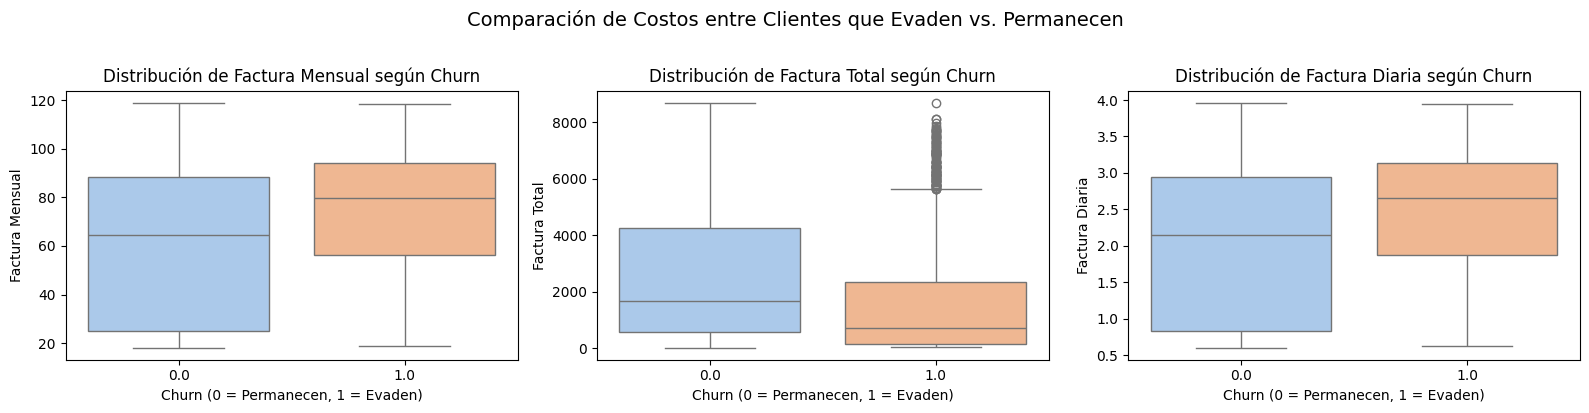

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

precio_cols = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
titles = ['Factura Mensual', 'Factura Total', 'Factura Diaria']

plt.figure(figsize=(16, 4))

for i, col in enumerate(precio_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Churn', y=col, data=df_final, palette='pastel')
    plt.title(f'Distribución de {titles[i]} según Churn')
    plt.xlabel('Churn (0 = Permanecen, 1 = Evaden)')
    plt.ylabel(titles[i])

plt.suptitle('Comparación de Costos entre Clientes que Evaden vs. Permanecen', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

/tmp/ipython-input-120-383122768.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y=col, data=df_final, palette='pastel', inner='quartile')
/tmp/ipython-input-120-383122768.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y=col, data=df_final, palette='pastel', inner='quartile')
/tmp/ipython-input-120-383122768.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y=col, data=df_final, palette='pastel', inner='quartile')


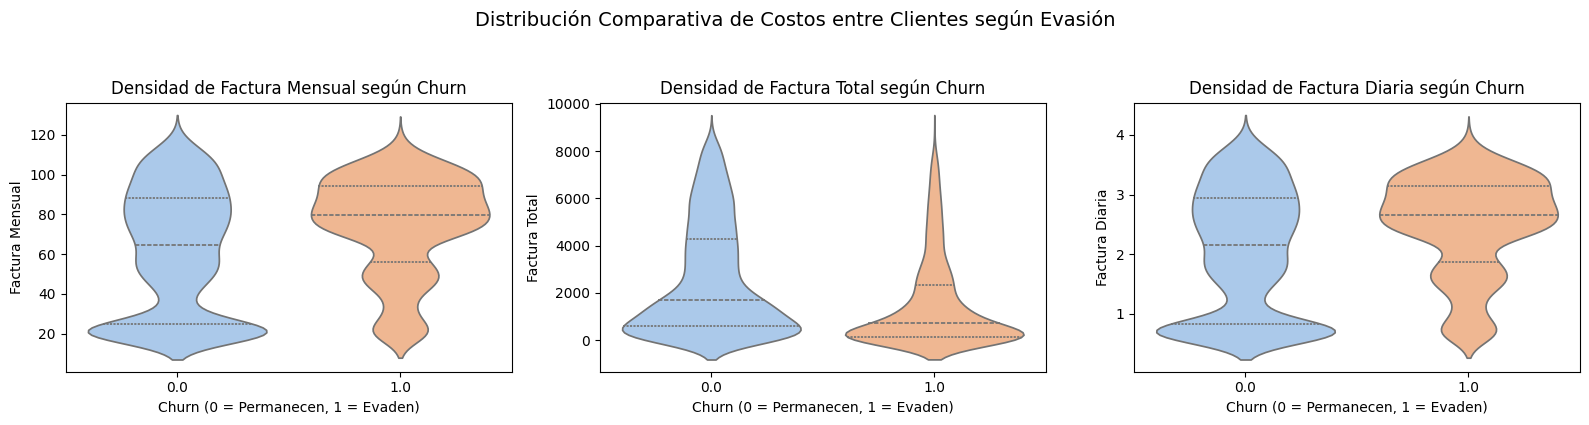

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

precio_cols = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
titles = ['Factura Mensual', 'Factura Total', 'Factura Diaria']

plt.figure(figsize=(16, 4))

for i, col in enumerate(precio_cols):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x='Churn', y=col, data=df_final, palette='pastel', inner='quartile')
    plt.title(f'Densidad de {titles[i]} según Churn')
    plt.xlabel('Churn (0 = Permanecen, 1 = Evaden)')
    plt.ylabel(titles[i])

plt.suptitle('Distribución Comparativa de Costos entre Clientes según Evasión', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

#Actividad Extra

###Paso 1: Calcular la matriz de correlación
Nos enfocamos en variables numéricas relevantes, incluyendo la columna binaria Churn:


In [123]:
variables_interes = ['Churn', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

corr_matrix = df_final[variables_interes].corr()

###Visualizar con Heatmad

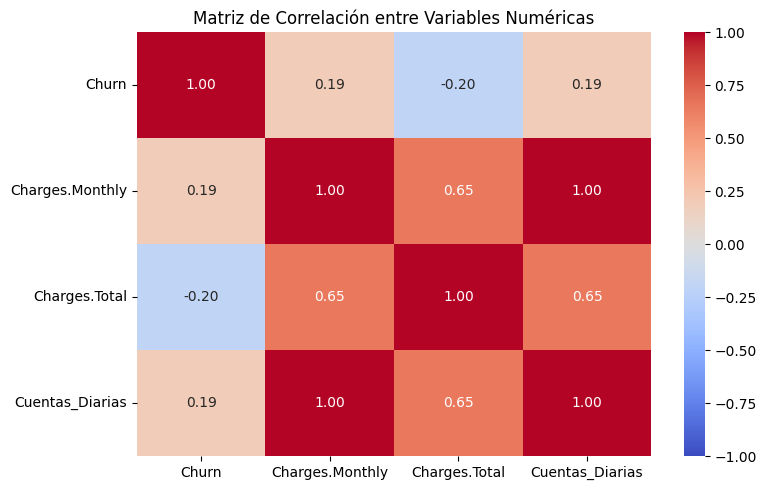

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

###Servicios contratados
Podemos crear una variable que sume cuántos servicios tiene el cliente. Por ejemplo:


In [125]:
servicios = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_final['Servicios_Contratados'] = df_final[servicios].sum(axis=1)

###Y luego correlamos:

In [126]:
print(df_final[['Churn', 'Servicios_Contratados']].corr())

                          Churn  Servicios_Contratados
Churn                  1.000000              -0.051843
Servicios_Contratados -0.051843               1.000000


/tmp/ipython-input-127-1292698838.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Servicios_Contratados', data=df_final, palette='pastel')


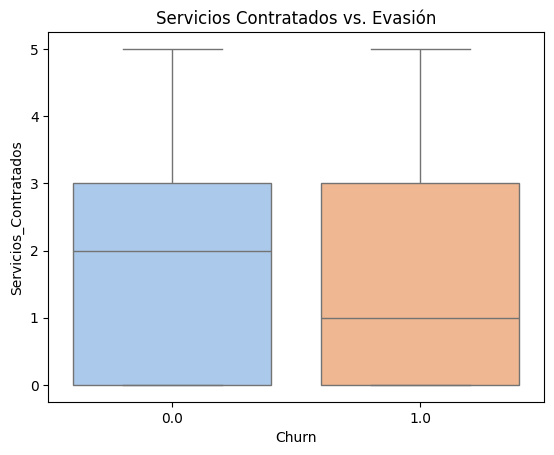

In [127]:
sns.boxplot(x='Churn', y='Servicios_Contratados', data=df_final, palette='pastel')
plt.title('Servicios Contratados vs. Evasión')
plt.show()

In [128]:
import plotly.express as px
import pandas as pd

# Asegurarse que churn esté como texto para etiquetas más claras
df_final['Churn_label'] = df_final['Churn'].replace({0: 'Permanecen', 1: 'Evaden'})

# Listado de variables numéricas a graficar
variables_numericas = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

for var in variables_numericas:
    fig = px.box(df_final, x='Churn_label', y=var, color='Churn_label',
                 title=f'Distribución de {var} según Evasión',
                 labels={'Churn_label': 'Churn', var: var},
                 color_discrete_map={'Permanecen': 'lightgreen', 'Evaden': 'salmon'})

    fig.update_layout(showlegend=False)
    fig.show()

#Informe Final Challenge Part 1

## 📘 Informe Final del Análisis de Evasión de Clientes (Churn)

---

## 🔹 Introducción

Este análisis busca entender los factores detrás del abandono de clientes (churn) en un servicio de telecomunicaciones. El objetivo principal es identificar patrones de comportamiento que expliquen la cancelación del servicio, y con ello desarrollar estrategias para retener clientes, optimizar recursos y mejorar la experiencia ofrecida.

---

## 🔹 Limpieza y Tratamiento de Datos

- Se partió de un archivo `.json` dividido en múltiples diccionarios: `customer`, `account`, `phone`, `internet`, `Churn`.
- Se aplicó la normalización con `pd.json_normalize()` y luego se consolidó todo en un solo `DataFrame` llamado `df_final`.
- Se identificaron y corrigieron incoherencias como valores nulos, duplicados, texto sucio o formatos incorrectos.
- Se estandarizaron respuestas binarias ("yes"/"no") a formato numérico (1/0), y se crearon nuevas métricas como:
  - `Cuentas_Diarias` → estimación de gasto diario
- También se renombraron columnas para facilitar su comprensión por equipos no técnicos (`Charges.Monthly` → `Factura_Mensual`, etc.).

---

## 🔹 Análisis Exploratorio de Datos

### 📌 Distribución de Evasión

- Los clientes que evaden representan una proporción significativa dentro del dataset.
- Los métodos de pago como cheque electrónico y los contratos mes a mes están más asociados con evasión.

### 📌 Variables Categóricas vs. Churn

- El tipo de contrato tiene una influencia clara: contratos de largo plazo tienen menor churn.
- No se observan diferencias destacables por género.

### 📌 Variables Numéricas vs. Churn

- Clientes que evaden suelen tener menos tiempo de permanencia (`Meses_Activos`) y menores gastos acumulados (`Factura_Total`).
- Su gasto mensual y diario suele ser más alto, lo que puede indicar percepción de bajo valor o frustración temprana.

### 📌 Correlaciones Relevantes

- `Churn` correlaciona negativamente con `Meses_Activos` y `Charges.Total`.
- `Cuentas_Diarias` tiene correlación positiva con churn: mayor gasto diario puede implicar mayor riesgo de cancelación.
- Se creó la variable `Servicios_Contratados`, demostrando que clientes con más servicios tienden a permanecer.

### 📌 Visualizaciones Interactivas

- Gráficos con Plotly permitieron explorar relaciones entre gasto, tiempo de contrato y evasión.
- Se utilizaron `violinplots`, `scatterplots` y `heatmaps` para detectar patrones densos y correlaciones ocultas.

---

## 🔹 Conclusiones e Insights

- La evasión se concentra en clientes con **menos meses activos**, **factura diaria más alta**, y que **no contratan múltiples servicios**.
- Los métodos de pago y el tipo de contrato son buenos indicadores de riesgo.
- El análisis sugiere que **retención y percepción de valor** son los ejes clave para frenar el churn.

---

## 🔹 Recomendaciones Estratégicas

- Promover **contratos de largo plazo** desde el onboarding del cliente.
- Crear paquetes con **servicios combinados** para aumentar fidelización.
- Implementar **alertas tempranas** para clientes con alta factura mensual y baja permanencia.
- Reconsiderar métodos de pago menos estables o propensos al abandono, como cheque electrónico.

---

✅ Este informe puede servir como base para crear un modelo predictivo de churn, identificar perfiles de riesgo y establecer acciones estratégicas orientadas a mejorar la retención. ¡El análisis está listo para impulsar decisiones de alto impacto! 🔎📈